In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer  # Это нужно до импорта IterativeImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Column transformation
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_absolute_percentage_error, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, make_scorer

# Encoding (additional)
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore') 

from datetime import datetime

In [3]:
path_test = 'test.csv' 
path_train_Y = 'train_Y.csv'
path_train = 'train.csv'

df_test = pd.read_csv(path_test)
df_train_Y = pd.read_csv(path_train_Y)
df_train = pd.read_csv(path_train)

print(df_test.shape, df_train_Y.shape, df_train.shape )
# print(df_train_Y.columns)

(23329, 21) (47363, 1) (47363, 21)


# **EDA_АНАЛИЗ**

## **Обычный анализ**

In [4]:
display(df_train.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0


In [5]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

None

In [6]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
HighBP,47363.0,0.563879,0.495908,0.0,0.0,1.0,1.0,1.0
HighChol,47363.0,0.523468,0.499454,0.0,0.0,1.0,1.0,1.0
CholCheck,47363.0,0.975741,0.153855,0.0,1.0,1.0,1.0,1.0
BMI,47363.0,29.862551,7.144498,12.0,25.0,29.0,33.0,98.0
Smoker,47363.0,0.475118,0.499386,0.0,0.0,0.0,1.0,1.0
Stroke,47363.0,0.062834,0.242666,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,47363.0,0.148766,0.355861,0.0,0.0,0.0,0.0,1.0
PhysActivity,47363.0,0.701940,0.457411,0.0,0.0,1.0,1.0,1.0
Fruits,47363.0,0.610814,0.487571,0.0,0.0,1.0,1.0,1.0
Veggies,47363.0,0.788844,0.408133,0.0,1.0,1.0,1.0,1.0


In [7]:
df_train.duplicated().sum()
#df_test.drop_duplicates(inplace=True)

979

In [8]:
for col in df_train.columns:
  print(f"{col} : {df_train[col].value_counts()}\n")

HighBP : HighBP
1.0    26707
0.0    20656
Name: count, dtype: int64

HighChol : HighChol
1.0    24793
0.0    22570
Name: count, dtype: int64

CholCheck : CholCheck
1.0    46214
0.0     1149
Name: count, dtype: int64

BMI : BMI
27.0    4214
26.0    3355
28.0    3065
24.0    2906
30.0    2891
        ... 
12.0       1
74.0       1
83.0       1
78.0       1
80.0       1
Name: count, Length: 78, dtype: int64

Smoker : Smoker
0.0    24860
1.0    22503
Name: count, dtype: int64

Stroke : Stroke
0.0    44387
1.0     2976
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0.0    40317
1.0     7046
Name: count, dtype: int64

PhysActivity : PhysActivity
1.0    33246
0.0    14117
Name: count, dtype: int64

Fruits : Fruits
1.0    28930
0.0    18433
Name: count, dtype: int64

Veggies : Veggies
1.0    37362
0.0    10001
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0.0    45351
1.0     2012
Name: count, dtype: int64

AnyHealthcare : AnyHealthcare
1.0    45212
0

In [9]:
unique_values = {}
for col in df_train.columns:
    unique_values[col] = df_train[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
HighBP,2
HighChol,2
CholCheck,2
BMI,78
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


## **Графики**

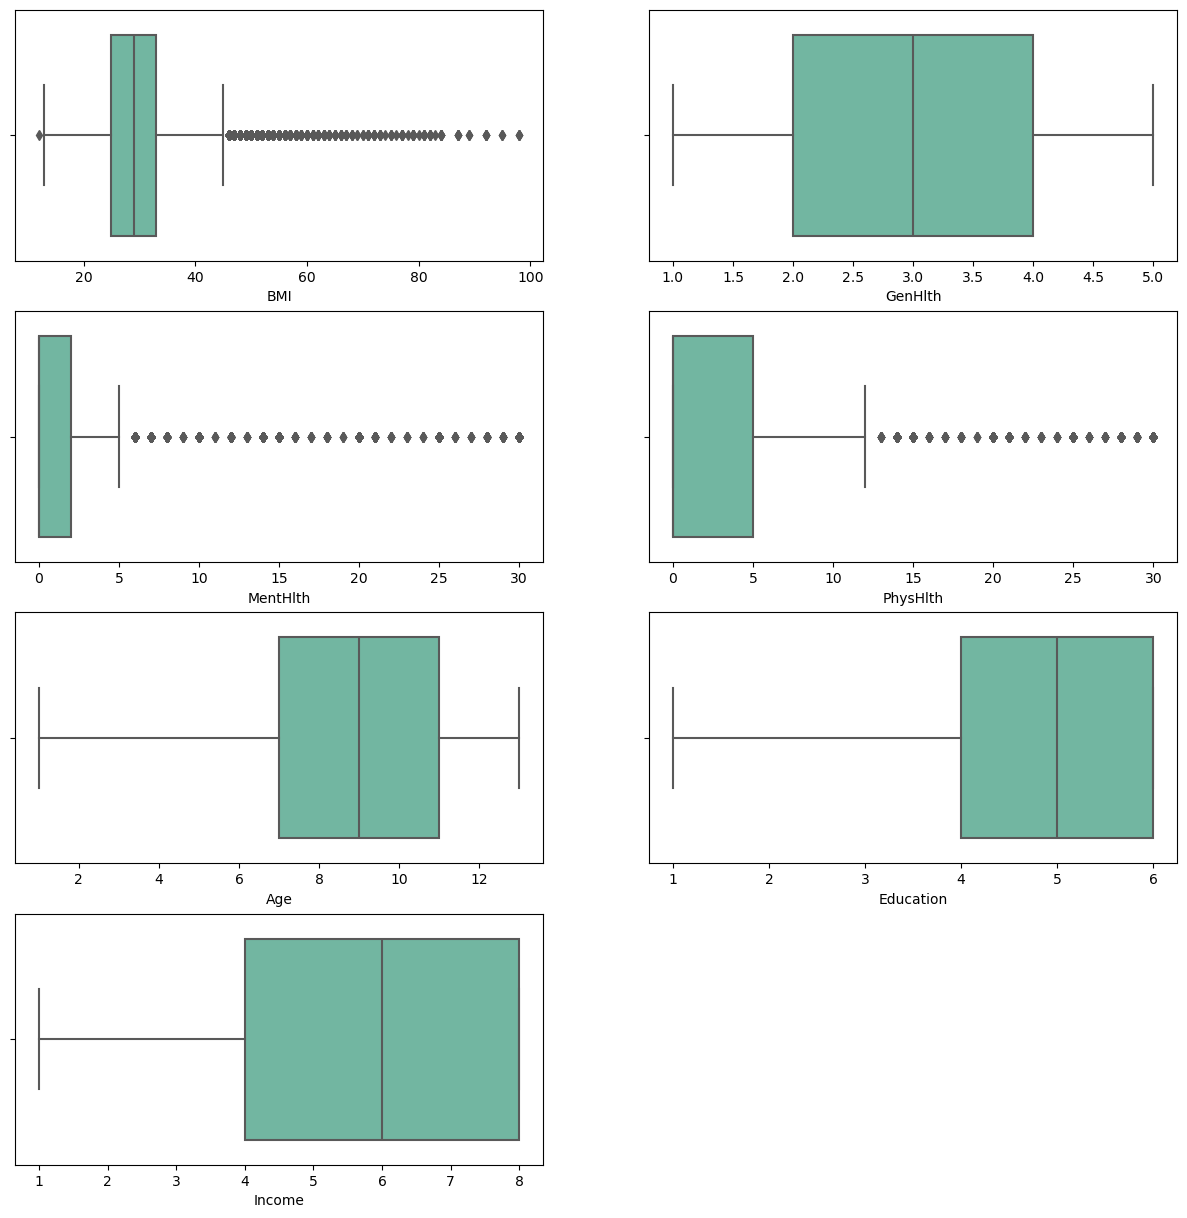

In [10]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df_train, palette='Set2')
plt.show()

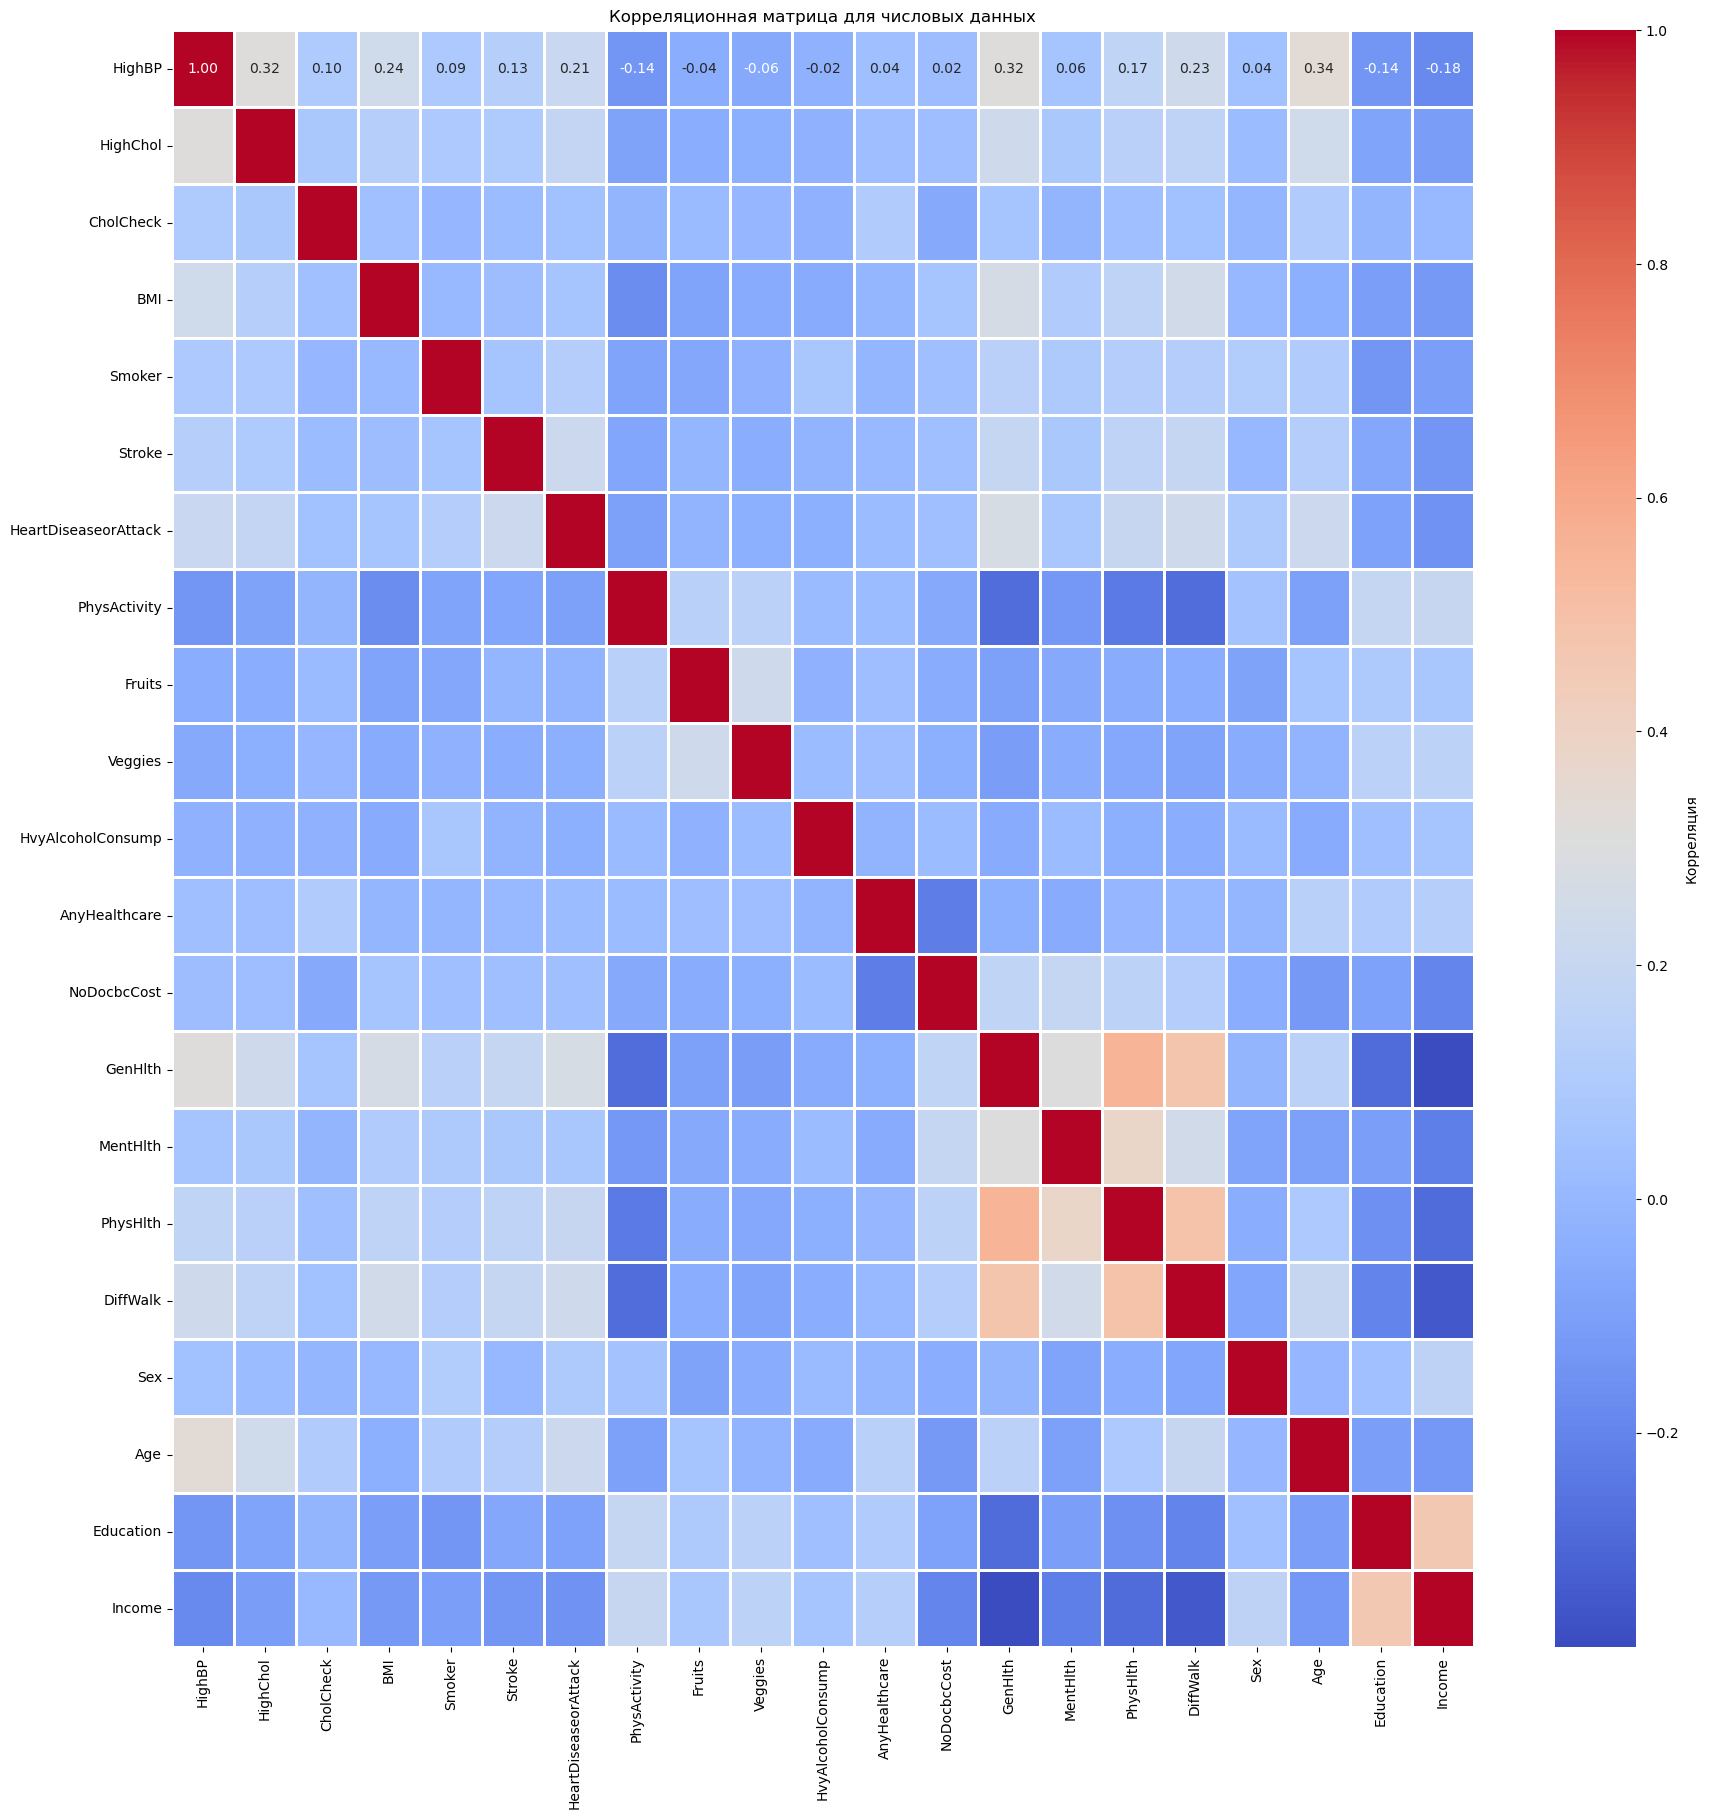

In [11]:
# Оставляем только числовые данные
numeric_df = df_train.select_dtypes(include=['number'])

# Корреляционная матрица для числовых данных
corr_matrix = numeric_df.corr()

# Тепловая карта корреляций
plt.figure(figsize=(21, 21))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, cbar_kws={'label': 'Корреляция'})
plt.title('Корреляционная матрица для числовых данных')
plt.show()

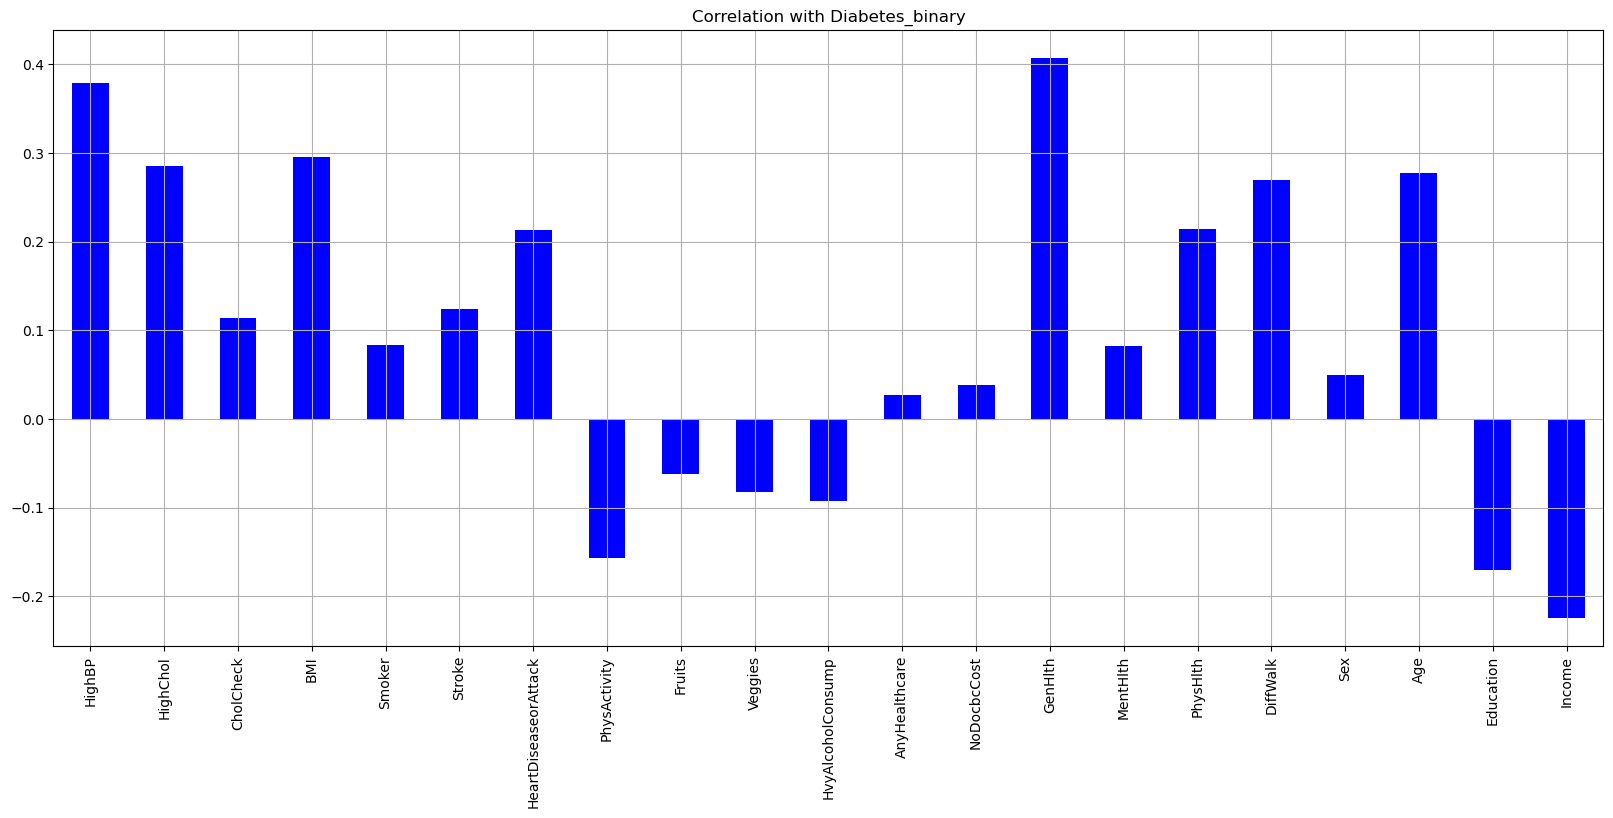

In [12]:
df_train.corrwith(df_train_Y.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Blue");

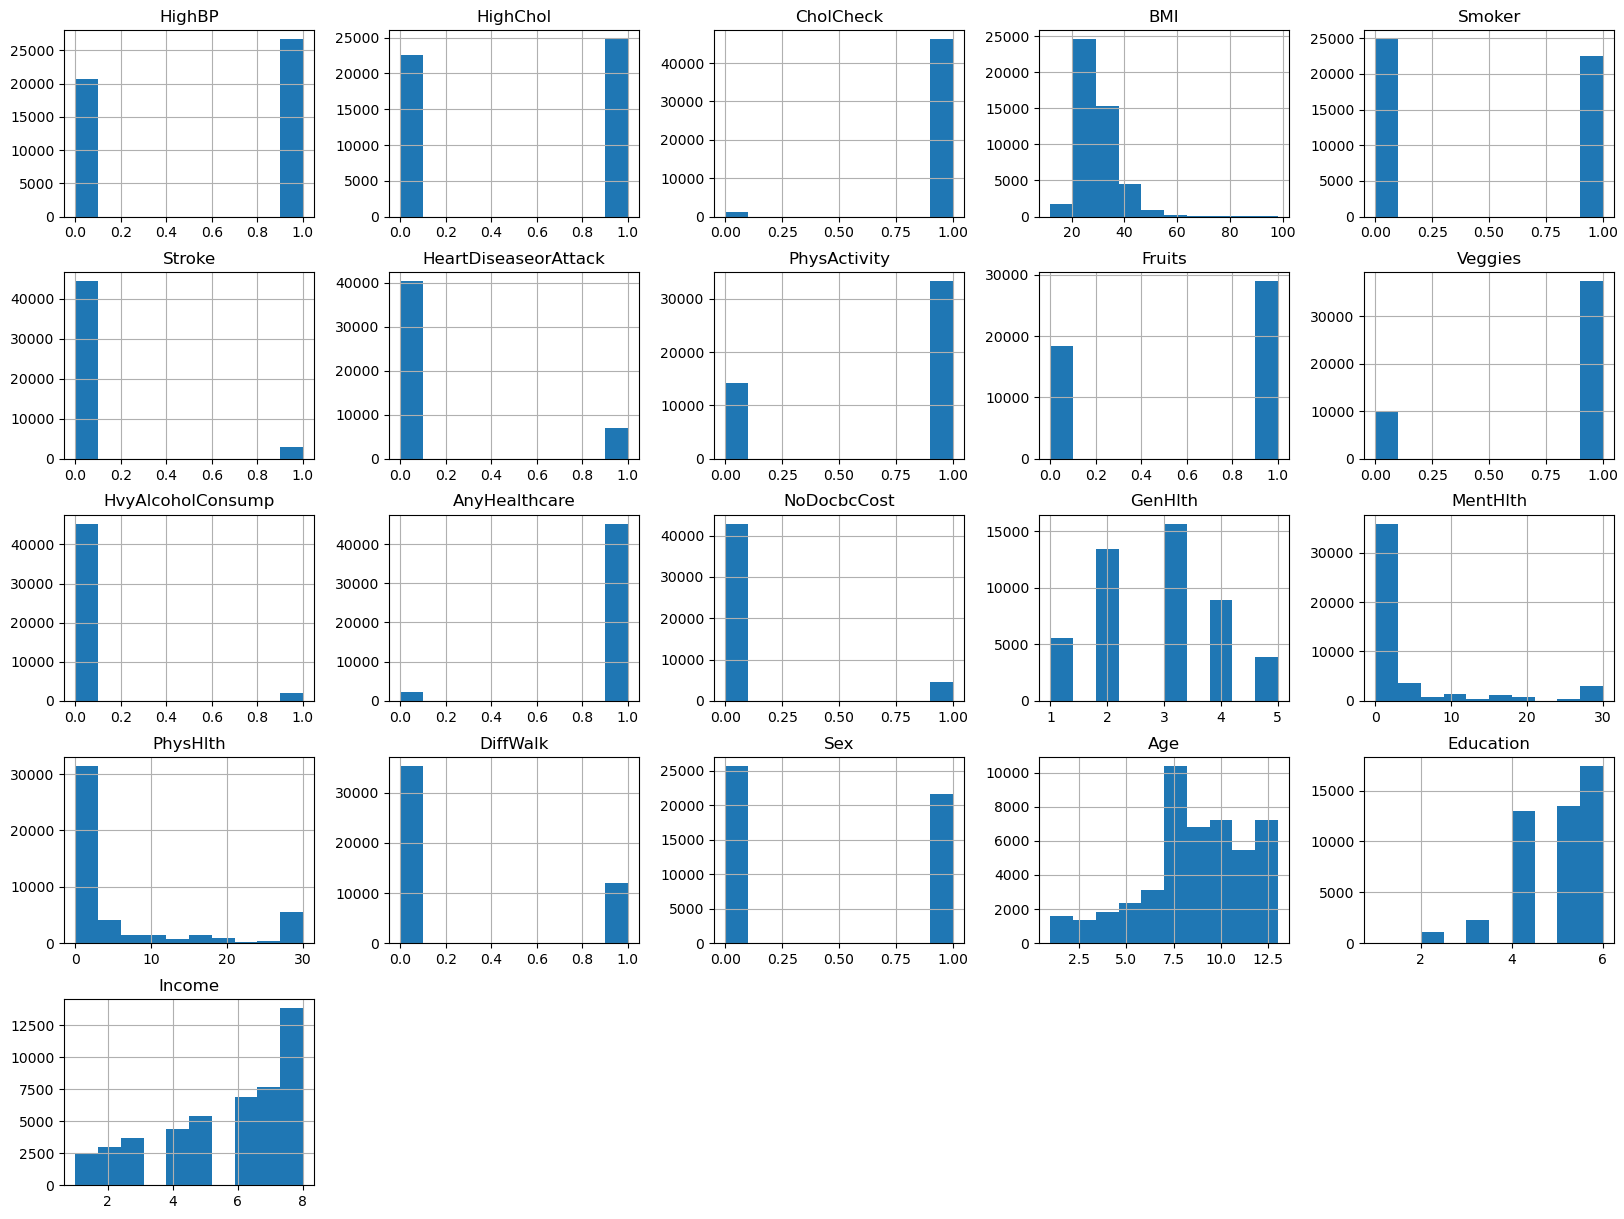

In [13]:
df_train.hist(figsize=(20,15));

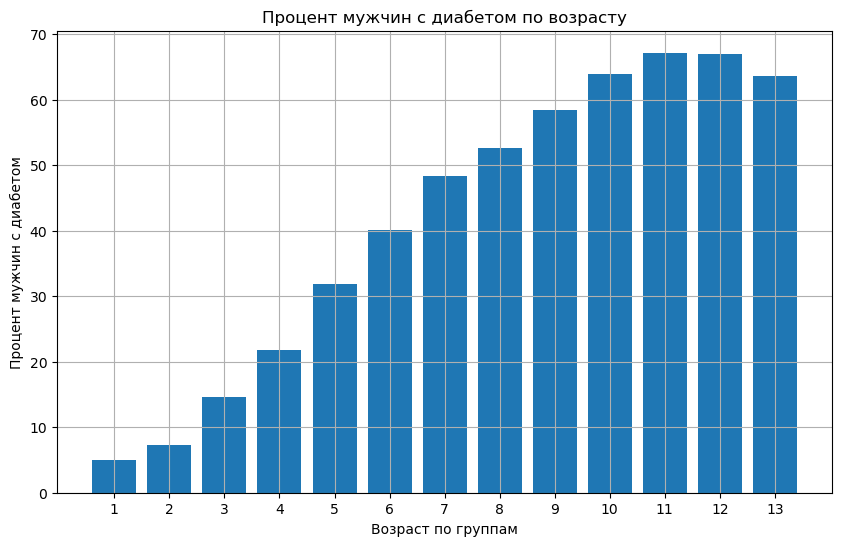

Максимальный процент мужчин с диабетом составляет 67.15% в возрастной категории 11.


In [14]:
df_all = pd.concat([df_train, df_train_Y], axis=1)
data_male = df_all[df_all['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes_binary'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes_binary'] * 100)
plt.xlabel('Возраст по группам')
plt.ylabel('Процент мужчин с диабетом')
plt.title('Процент мужчин с диабетом по возрасту')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True) 
plt.show()
max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes_binary'].idxmax()]
print("Максимальный процент мужчин с диабетом составляет {:.2f}% в возрастной категории {}.".format(max_percent_age['Diabetes_binary'] * 100, int(max_percent_age['Age'])))

# починить 

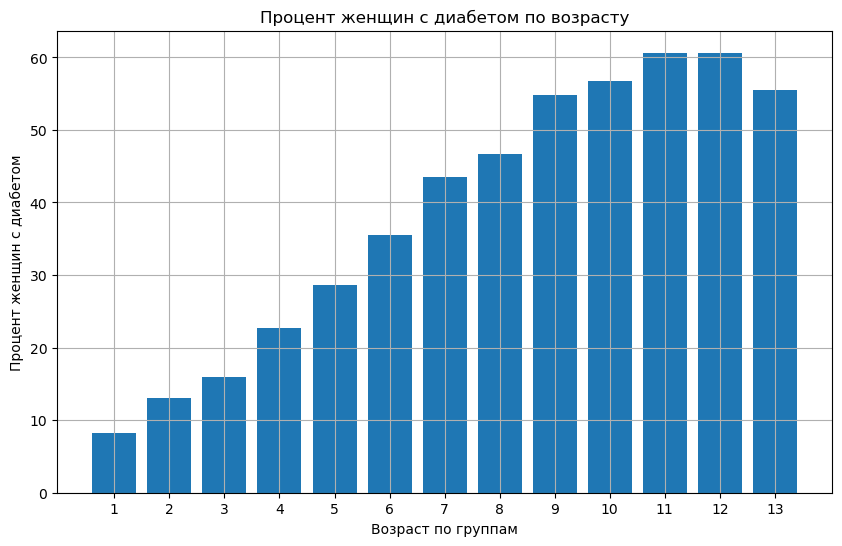

Максимальный процент женщин с диабетом составляет 60.63% в возрастной категории 11.


In [15]:
data_male = df_all[df_all['Sex'] == 0]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes_binary'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes_binary'] * 100)
plt.xlabel('Возраст по группам')
plt.ylabel('Процент женщин с диабетом')
plt.title('Процент женщин с диабетом по возрасту')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True) 
plt.show()
max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes_binary'].idxmax()]
print("Максимальный процент женщин с диабетом составляет {:.2f}% в возрастной категории {}.".format(max_percent_age['Diabetes_binary'] * 100, int(max_percent_age['Age'])))

# починить 

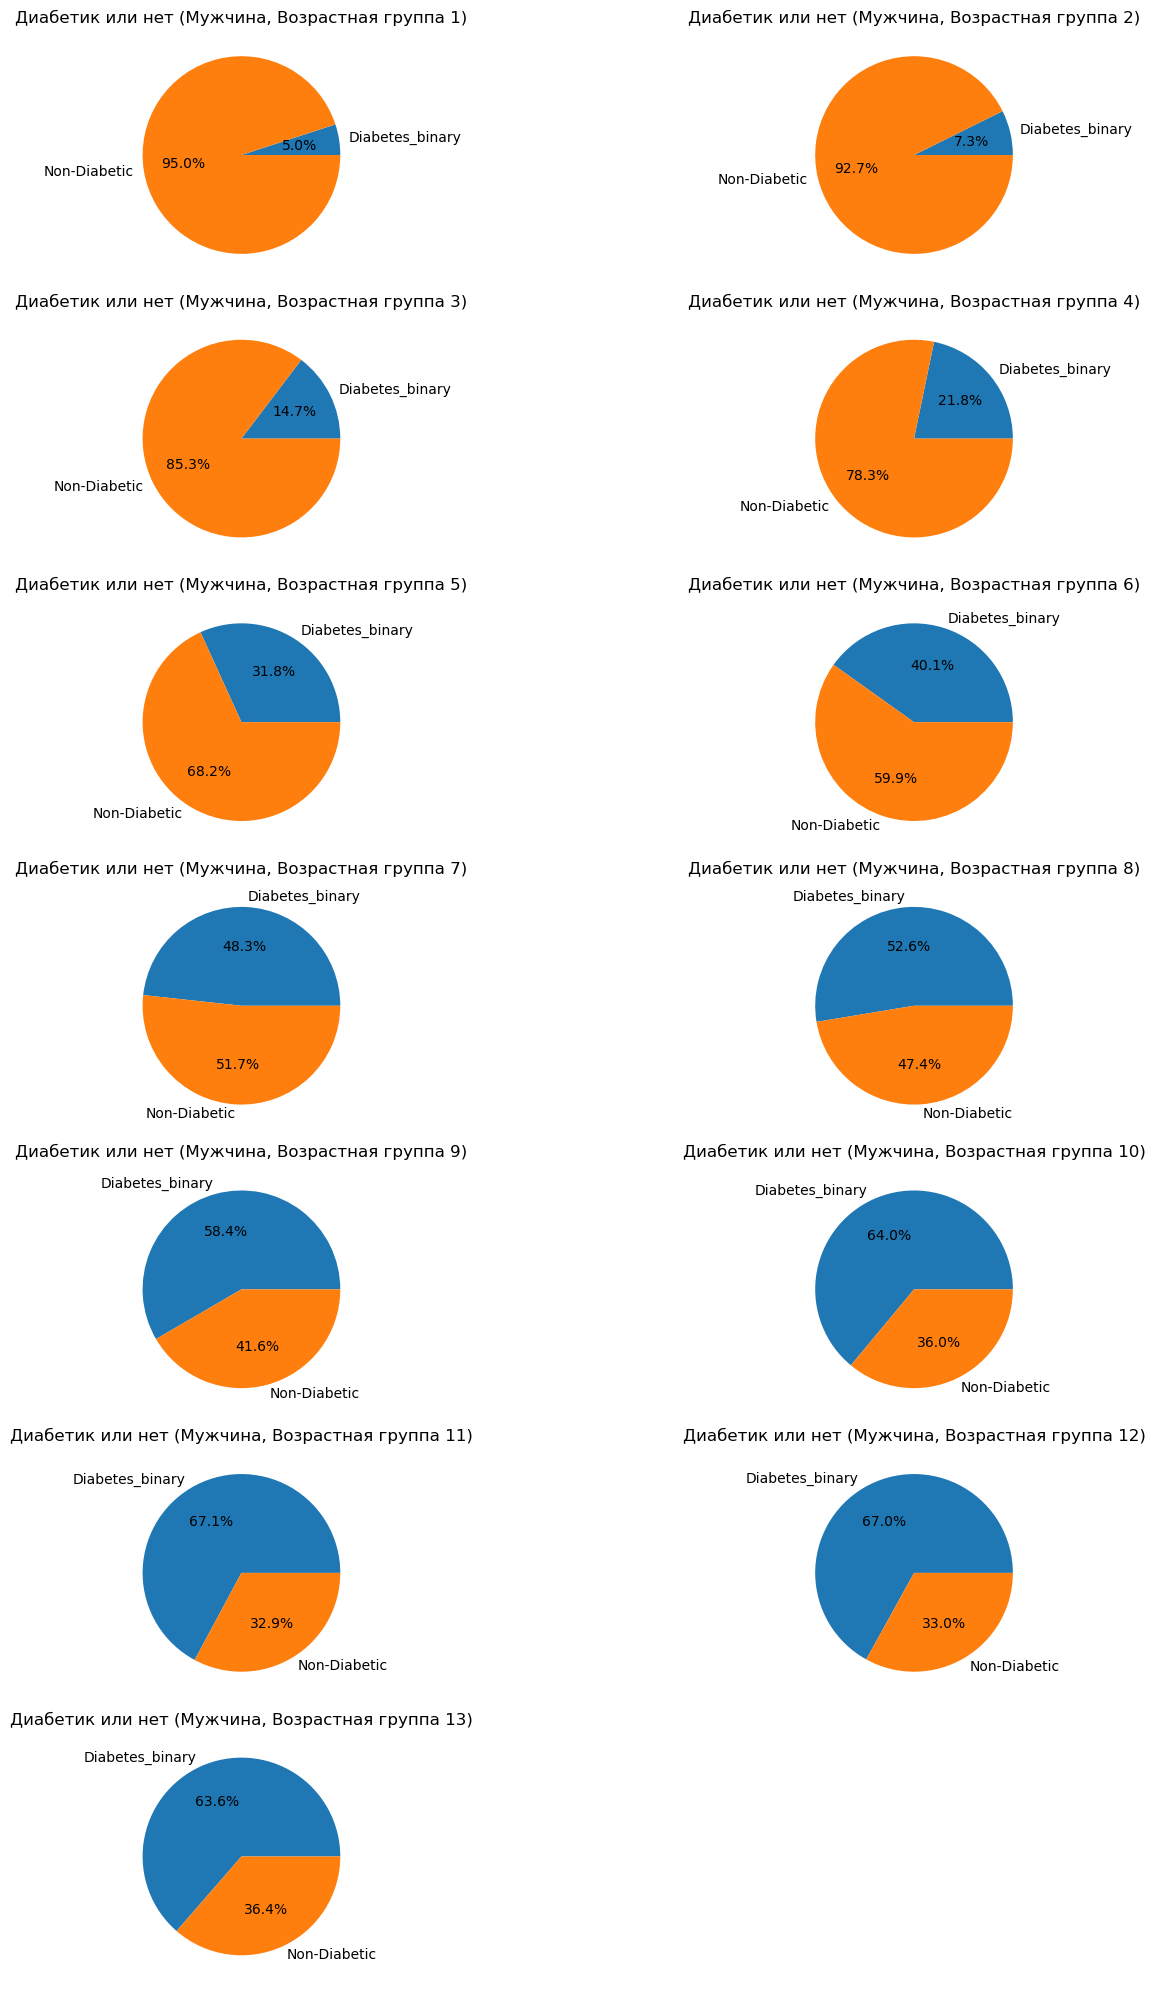

In [16]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = df_all[(df_all['Sex'] == 1) & (df_all['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes_binary'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes_binary'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetes_binary', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Диабетик или нет (Мужчина, Возрастная группа {age})')
plt.tight_layout()
plt.show()

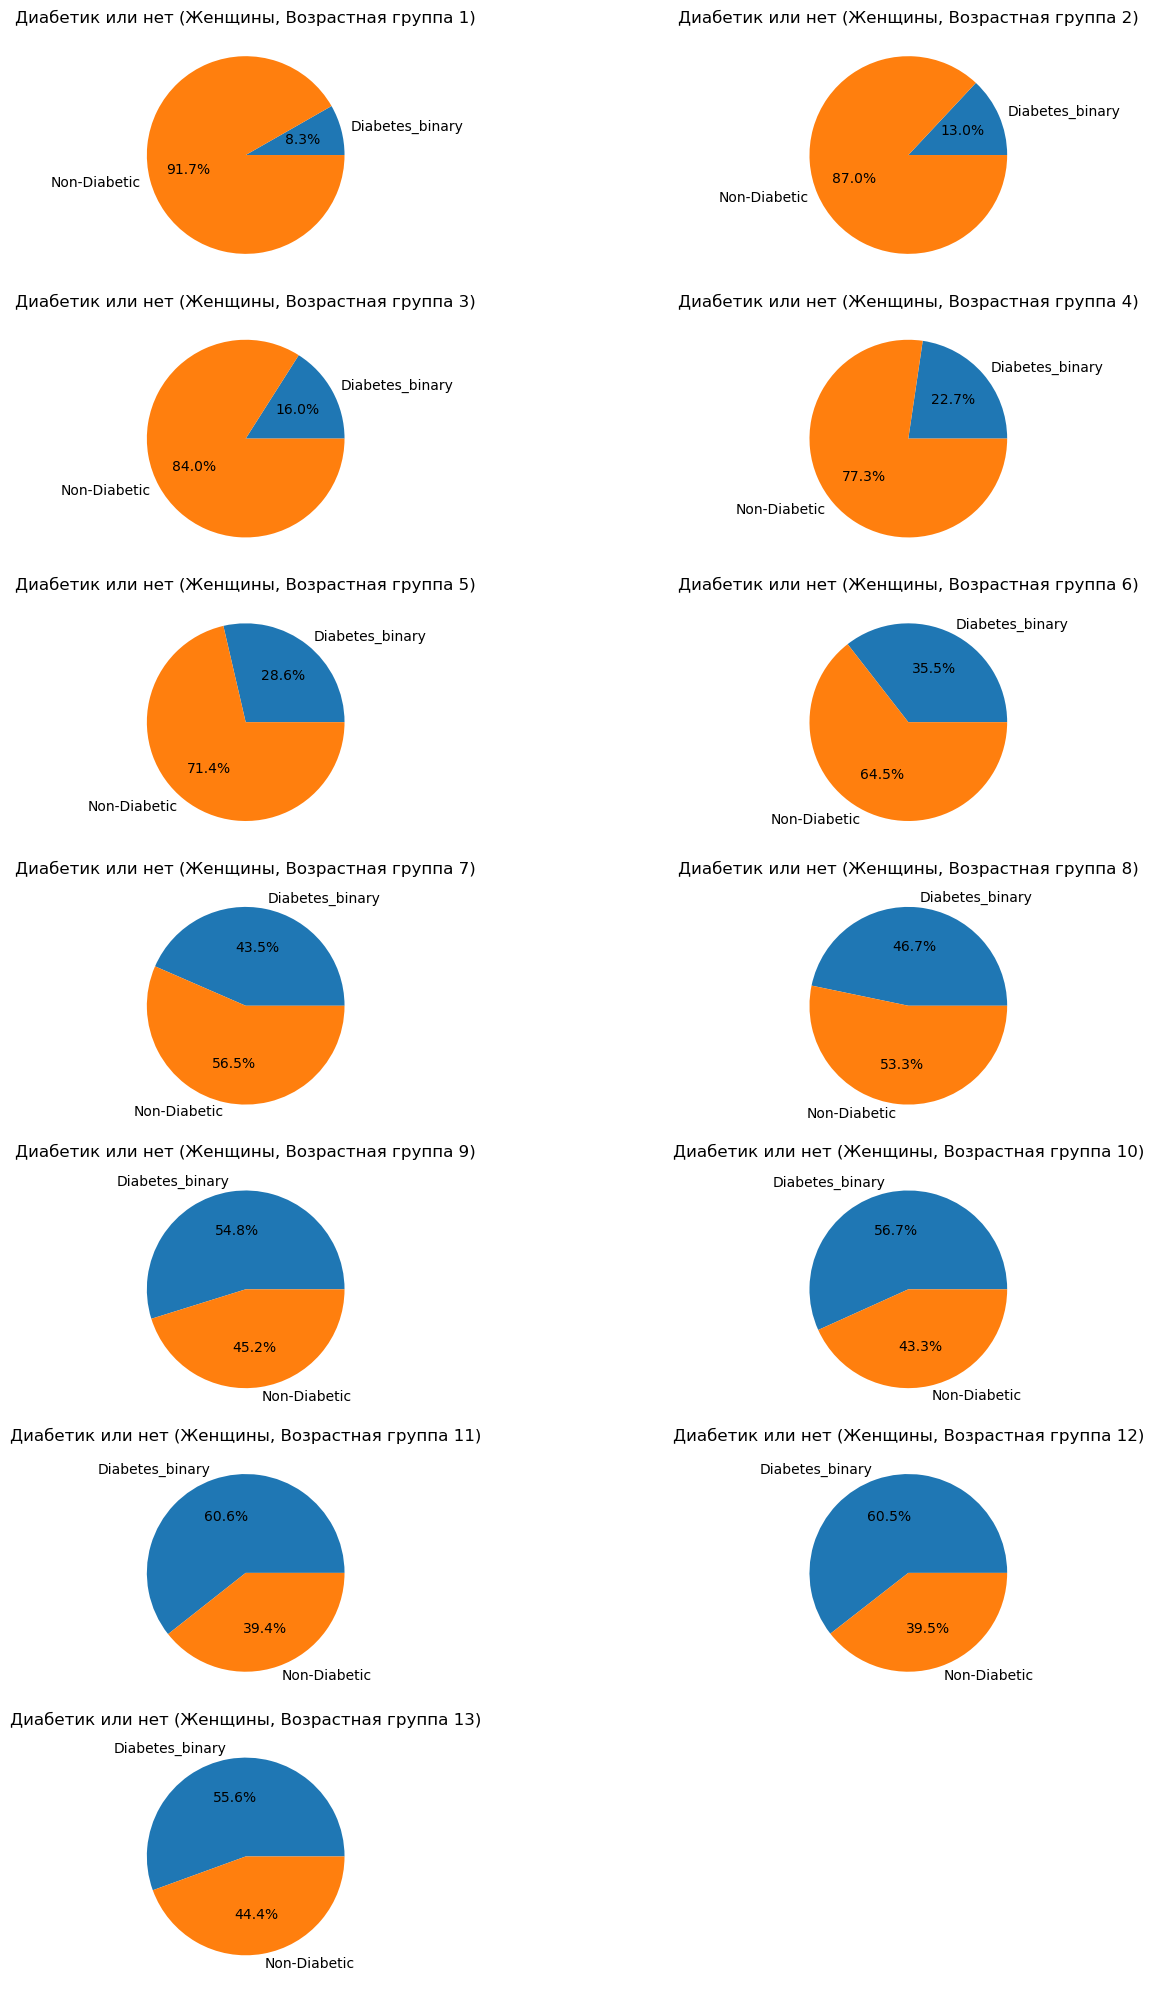

In [17]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = df_all[(df_all['Sex'] == 0) & (df_all['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes_binary'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes_binary'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetes_binary', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Диабетик или нет (Женщины, Возрастная группа {age})')
plt.tight_layout()
plt.show()

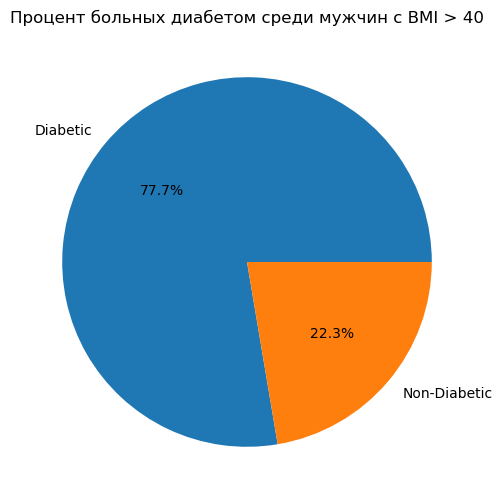

Процент больных диабетом среди мужчин с BMI > 40: 77.7%


In [18]:
male_high_bmi = df_all[(df_all['Sex'] == 1) & (df_all['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes_binary'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Процент больных диабетом среди мужчин с BMI > 40')
plt.show()

print(f"Процент больных диабетом среди мужчин с BMI > 40: {percent_diabetic:.1f}%")

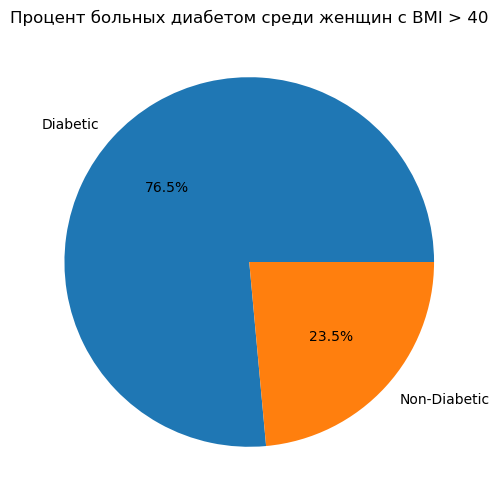

Процент больных диабетом среди женщин с BMI > 40: 76.5%


In [19]:
male_high_bmi = df_all[(df_all['Sex'] == 0) & (df_all['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes_binary'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Процент больных диабетом среди женщин с BMI > 40')
plt.show()

print(f"Процент больных диабетом среди женщин с BMI > 40: {percent_diabetic:.1f}%")

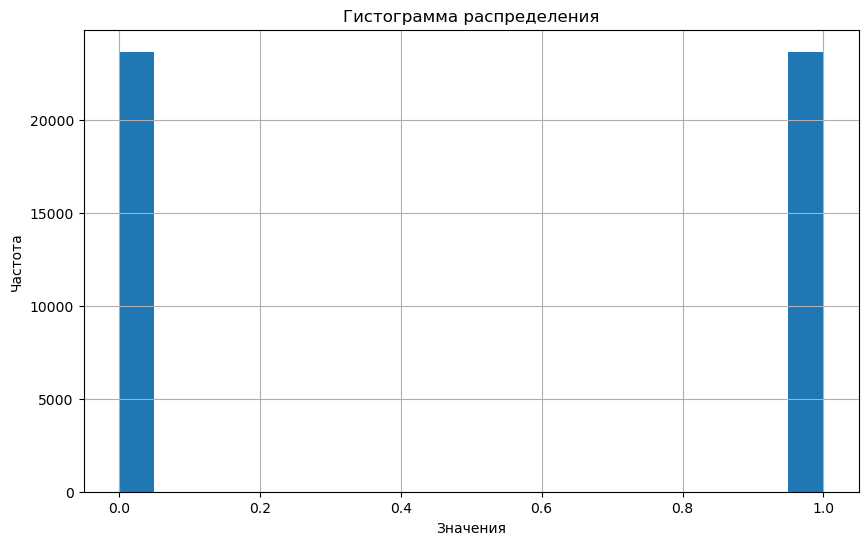

In [20]:
df_train_Y.hist(bins=20, figsize=(10, 6))  
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.title("Гистограмма распределения")
plt.show()

# **Эконометрические тестики - посмотрим что да как или не совсем**

### Интерпретация значений VIF:

- VIF = 1: Полное отсутствие мультиколлинеарности. Это идеальный случай, означающий, что данная переменная не связана ни с одной другой независимой переменной.
  
- VIF < 5 или VIF < 10: В зависимости от принятых стандартов, такие значения считаются приемлемыми уровнями мультиколлинеарности. Некоторые исследователи считают значение до 5 нормальным, другие допускают до 10. Однако чем ближе VIF к 1, тем лучше.

- VIF > 10: Указывает на сильную мультиколлинеарность. В этом случае рекомендуется пересмотреть модель, возможно исключить одну из сильно связанных переменных или преобразовать их таким образом, чтобы снизить влияние мультиколлинеарности.



## **VIF**

In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_VIF(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = add_constant(df_train)  
vif_result = calc_VIF(X)
display(vif_result)

,variables,VIF
0,const,127.940341
1,HighBP,1.354448
2,HighChol,1.178864
3,CholCheck,1.032633
4,BMI,1.180000
5,Smoker,1.081089
6,Stroke,1.091480
7,HeartDiseaseorAttack,1.190522
8,PhysActivity,1.170477
9,Fruits,1.100211


## **ANOVA TEST**

In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

X = df_train.iloc[:, 1:]  
Y = df_train_Y.iloc[:, 0]  

fs = SelectKBest(score_func=f_classif, k=17)
fs.fit(X, Y)  
selected_features = X.columns[fs.get_support()]
X_selected = fs.transform(X)
print("Shape of selected features:", X_selected.shape)

# Создание DataFrame с отобранными признаками
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
display(X_selected_df.head(5))


Shape of selected features: (47363, 17)


,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,0.0,6.0,6.0,3.0
1,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,15.0,0.0,10.0,4.0,5.0
2,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,30.0,30.0,0.0,4.0,5.0,1.0
3,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,8.0,6.0,7.0
4,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,5.0,4.0,5.0


## **ХИ-квадрат**

In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X, Y)

df_scores = pd.DataFrame(fit.scores_, columns=['Score'])  # Оценки фич
df_columns = pd.DataFrame(X.columns, columns=['Feature'])  # Названия фич
f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores = f_Scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Отображение
display(f_Scores)

,Feature,Score
0,PhysHlth,37752.124599
1,BMI,7052.449367
2,MentHlth,5663.147050
3,Age,3445.270425
4,GenHlth,3425.676129
5,DiffWalk,2573.236029
6,Income,1985.128765
7,HighChol,1837.975777
8,HeartDiseaseorAttack,1833.063681
9,Stroke,677.493803


In [23]:
# colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"] 
# df_train.drop(colomns , axis= 1 ,inplace=True)

# **Вывод**
1. мужчины и женщины одинаково подвержены диабету.

2. люди старше 45 лет более уязвимы к диабету, чем молодые. с увеличением возраста увеличивается и число больных диабетом.

3. при повышении уровня образования число больных диабетом уменьшается.

4. Люди с низким уровнем дохода подвержены большему риску развития диабета, чем люди с высоким уровнем дохода.

5. Возраст, образование и доход не имеют выбросов.

заключение


1. основными переменными признаков для диабета являются : HIghBP, HighChol, BMI, Stroke, GenHlth, MentHlth, PhysHlth, Age, Eduation and Income.

2. Переменные характеристики, которые в совокупности повышают риск развития диабета, включают в себя: Курение и высокое потребление алкоголя, инсульт и сердечно-сосудистые заболевания, высокое АД и высокий уровень холестерина.

3. Переменные характеристики, которые наименее эффективны при диабете, но могут помочь в снижении риска диабета, - это: PhysActivity, Fruits, Veggies, AnyHealthcare, CholChek.

# **ПОСТРОЕНИЕ МОДЕЛЕЙ**

Метрика должна быть нацелена на выявление диабета, при этом штрафовать за пропущенный диабет в два раза больше, чем за ошибочный диагноз диабета.

В вашем итоговом файле должны быть собраны три модели и получено три оценки (три вектора y_pred_...). Важно соблюдать требования по оформлению имен данных векторов, или оценка будет снижена.
Алгоритмы оцениваемые:

Оценка полученная на основе алгоритма  RandomForestClassifier или ExtraTreesClassifier
Оценка полученная на основе алгоритма  GradientBoostingClassifier или HistGradientBoostingClassifier
Оценка итоговой модели. Тут может быть любая модель из scikit-learn за исключением нейросетей. Естественно можно использовать Voiting или Staking.

# **RandomForestClassifier или ExtraTreesClassifier**

Для построения леса нам нужны различные деревья построенные на общих данных, но у нас получатся клоны ...
Как же это избежать:

Использовать бутстрап (отбираем строки из исходного набора с возвратом) для отбора строк с данными для построения одного дерева и повторить как можно больше раз.
Агрегировать бутстрапы (бэггинг) и получить ответы - для классификации по большинству, для регрессии среднее арифметическое.
Как дополнительно услилить различие в деревьях (важно соблюдать меру ...):

Использовать случайный набор признаков для построения расшепления внутри каждого дерева на каждом шаге
Использовать прунинг (стрижку) - кстати не слишеом эффективное решение в 90% случаев ...
Модель строит рейтинг своих признаков.

Модель позволяет оценить уверенность в ответе - дисперсия ответов деревьев.

Модель позволяет автоматический котроль результатов  обучения из-за бутстрапа - OOB (out of bag), о кросвалидация нужна ли ты?

RandomForestClassifier(
n_estimators=100, - число деревьев, чем больше тем лучше ТОЛЬКО АЛЬТЕРНАТИВНО ОДАРЕННЫЙ СТУДЕНТ ИЩЕТ ОПТИМУМ ПО ЧИСЛУ ДЕРЕВЬЕВ:)

criterion='gini', - критерий разбиения {“gini”, “entropy”, “log_loss”}, практически не влияет, но связан с выбором "оптимальной" метрики качества, на практике поговорим

max_depth=None, лучше не трогать, опыт показывает, что к этому параметру не нужно относится как к регуляризации (правда иногда ограничение глубины позволяет бороться с выбросами)

min_samples_split=2, - минимальная выборка для разбиения

min_samples_leaf=1, - минимальная выборка в листе

min_weight_fraction_leaf=0.0, - гарантирует, что листы содержат по крайней мере часть общей суммы весов выборки (выборка должны быть сбалансирована, иначе будет крен по весам)

max_features='sqrt', - число признаков для разбиения {“sqrt”, “log2”, None}

max_leaf_nodes=None, практияески тоже, что и max_depth, но про узлы

min_impurity_decrease=0.0, - порог измерения зашумленности данных, если рабиение не слишком меняет величину критерия разбиения, то дальнейшее разбиение не происходит, интересен

тем, что sklearn нормирован на количество строк попавших в выбоку, что позволяет вначале рабивать данные даже при незначительном уменьшении критерия разбиения, а затем ниже останавливаться
bootstrap=True, кто поставит False пойдет искать Великую Китайскую Стену ...

oob_score=False, теперь я думаю понятно, когда ставим True и для чего

n_jobs=None, всегда ставим -1

random_state=None,

verbose=0,

warm_start=False, - докинуть данных в уже сущесвующий лес и обученный лес и дообучить

class_weight=None, - пербалансировка важности классов

ccp_alpha=0.0,

max_samples=None - максимум строк при влюченном бутстрапе
)

In [38]:
from sklearn.ensemble import RandomForestClassifier
X = df_all.drop(columns=['Diabetes_binary'])  
y = df_all['Diabetes_binary']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
forest = RandomForestClassifier(n_estimators=1000, max_features=10, oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.997
Правильность на OOB: 0.733
Правильность на тестовом наборе: 0.731


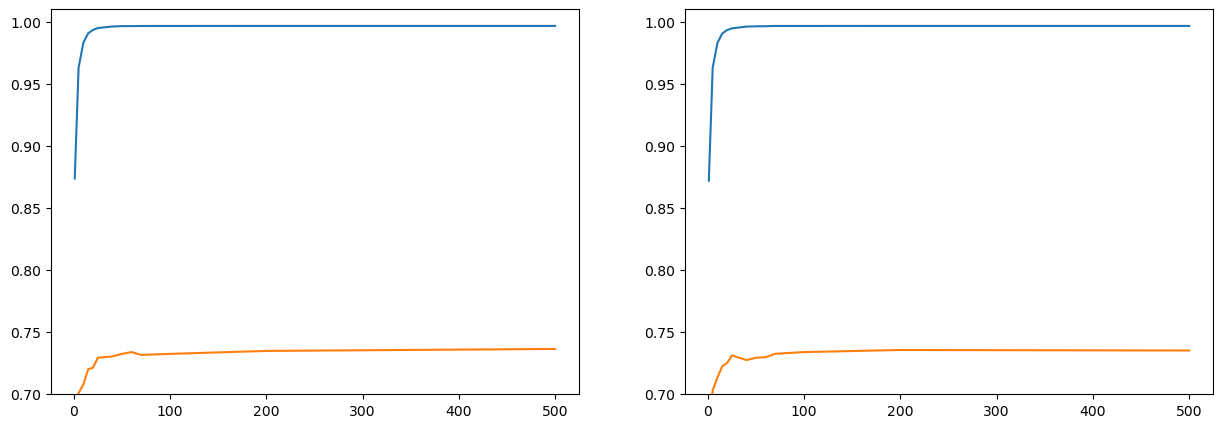

In [41]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 700, 850, 1000]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.7, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.7, 1.01);

In [42]:
print("Минимум sc_train1:", min(sc_train1))
print("Максимум sc_train1:", max(sc_train1))
print("Минимум sc_test1:", min(sc_test1))
print("Максимум sc_test1:", max(sc_test1))

Минимум sc_train1: 0.8736839141940206
Максимум sc_train1: 0.9965936602668769
Минимум sc_test1: 0.6557723165273204
Максимум sc_test1: 0.7365087408158095


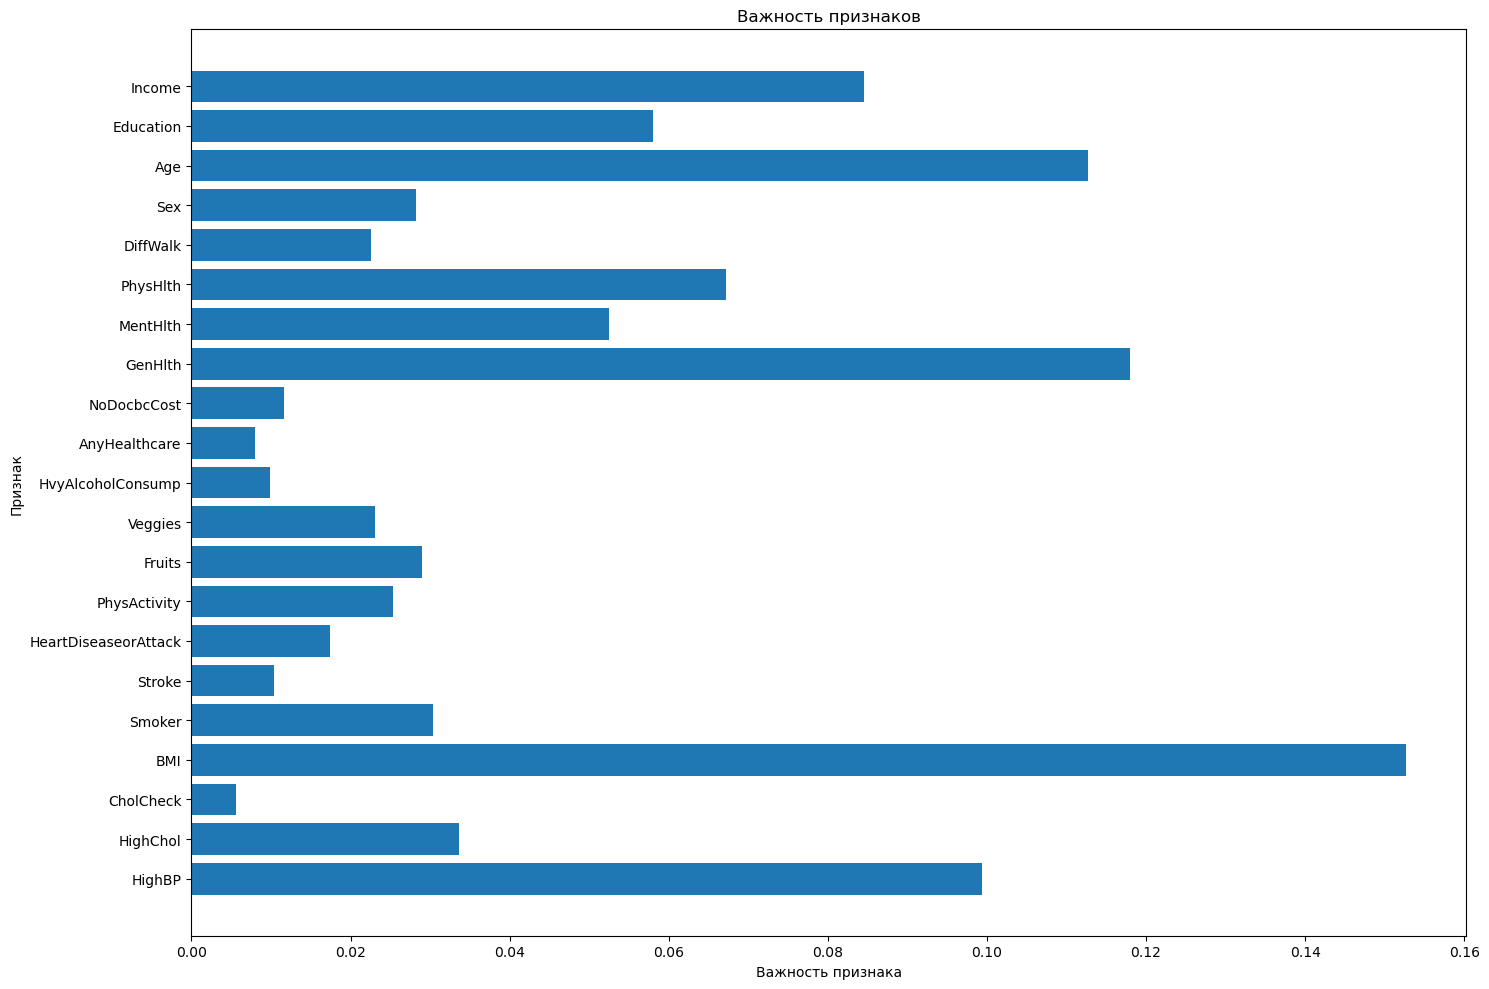

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для отображения важности признаков
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)  # Количество признаков
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.title("Важность признаков")
    plt.tight_layout()

# Убираем целевую переменную, чтобы получить список имен признаков
feature_names = df_all.drop(columns=['Diabetes_binary']).columns

# Построение графика
plt.figure(figsize=(15, 10))
plot_feature_importances(forest, feature_names)
plt.show() 

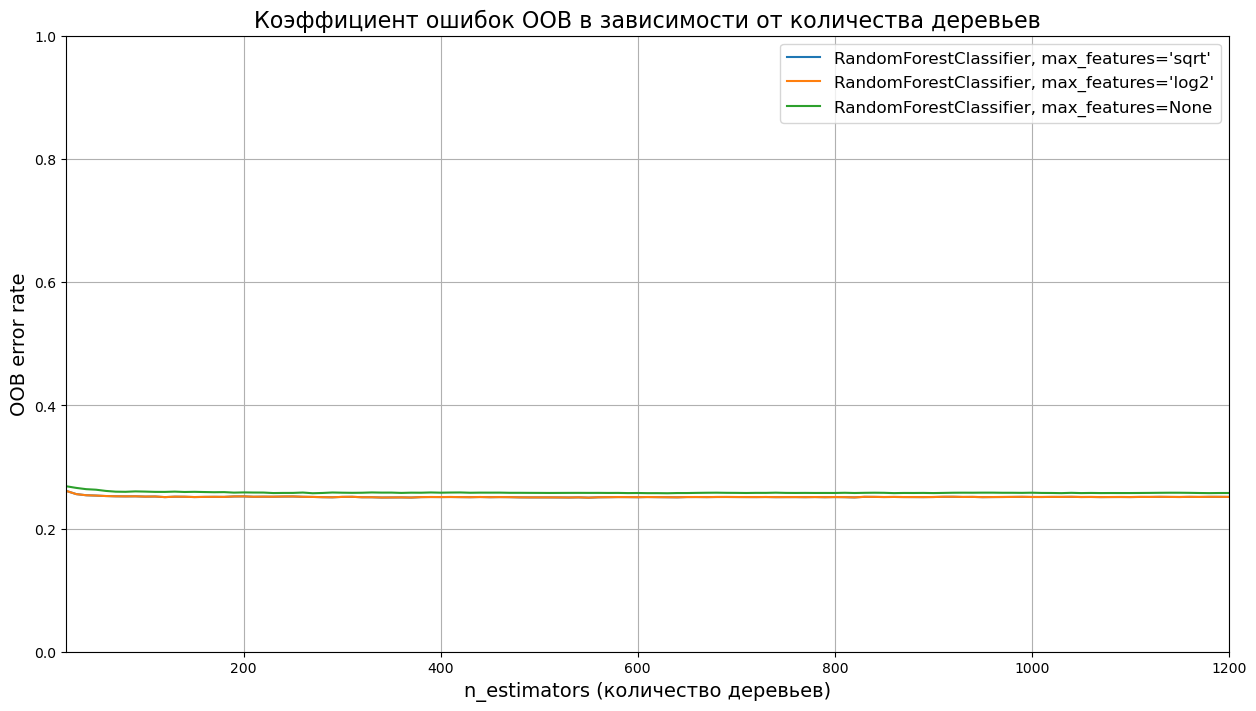

In [48]:
from collections import OrderedDict
RANDOM_STATE = 42
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs = -1,
            warm_start=True,
            min_samples_leaf = 5,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Настройка диапазона для n_estimators
min_estimators = 20
max_estimators = 1200

# Считаем коэффициенты ошибок
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Построение графиков
plt.figure(figsize=(15, 8))  # Увеличиваем размеры графика

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

# Настройка осей
plt.xlim(min_estimators, max_estimators)
plt.ylim(0, 1)  # Фиксируем ось Y от 0 до 1

# Добавление подписей и легенды
plt.xlabel("n_estimators (количество деревьев)", fontsize=14)
plt.ylabel("OOB error rate", fontsize=14)
plt.title("Коэффициент ошибок OOB в зависимости от количества деревьев", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)  # Добавляем сетку для удобства

# Показываем график
plt.show()

Обучение модели: RandomForestClassifier, max_features='sqrt'
n_estimators=20, OOB Error=0.2609931873205338
n_estimators=30, OOB Error=0.25586960193682784
n_estimators=40, OOB Error=0.25403975001407575
n_estimators=50, OOB Error=0.25347671865322896
n_estimators=60, OOB Error=0.2527447778841282
n_estimators=70, OOB Error=0.252322504363493
n_estimators=80, OOB Error=0.2521817465232813
n_estimators=90, OOB Error=0.25229435279545076
n_estimators=100, OOB Error=0.25181577613873096
n_estimators=110, OOB Error=0.2519565339789426
n_estimators=120, OOB Error=0.2509993806655031
n_estimators=130, OOB Error=0.25167501829851924
n_estimators=140, OOB Error=0.2515624120263499
n_estimators=150, OOB Error=0.2510838353696301
n_estimators=160, OOB Error=0.25133719948201116
n_estimators=170, OOB Error=0.2514498057541805
n_estimators=180, OOB Error=0.25133719948201116
n_estimators=190, OOB Error=0.2520409886830697
n_estimators=200, OOB Error=0.25215359495523904
n_estimators=210, OOB Error=0.2515624120263499

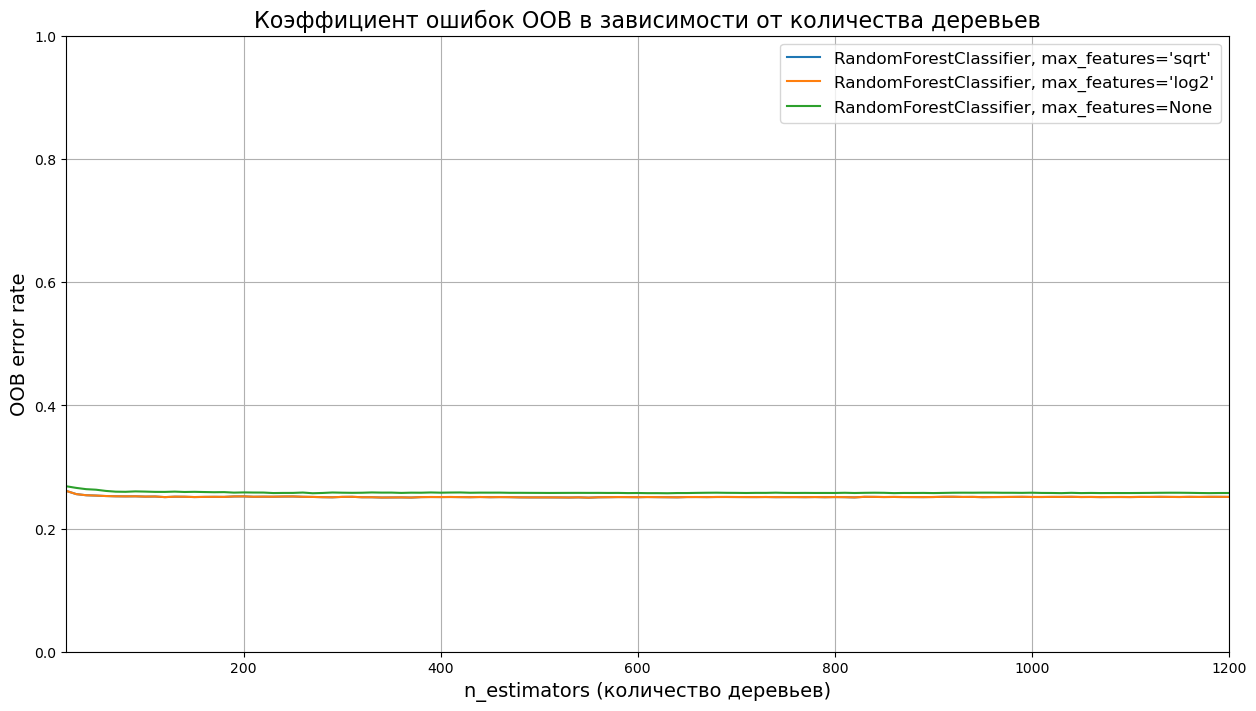

In [49]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# Убедимся, что данные готовы
assert X_train is not None and y_train is not None, "Данные для обучения отсутствуют!"

# Проверка параметров
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs=-1,
            min_samples_leaf=5,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs=-1,
            warm_start=True,
            min_samples_leaf=5,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs=-1,
            min_samples_leaf=5,
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Настройка диапазона для n_estimators
min_estimators = 20
max_estimators = 1200

# Считаем коэффициенты ошибок
for label, clf in ensemble_clfs:
    print(f"Обучение модели: {label}")
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        try:
            clf.fit(X_train, y_train)
            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))
            print(f"n_estimators={i}, OOB Error={oob_error}")
        except Exception as e:
            print(f"Ошибка при обучении с n_estimators={i}: {e}")
            break  # Прерываем цикл для текущей модели при ошибке

# Построение графиков
plt.figure(figsize=(15, 8))  # Увеличиваем размеры графика

for label, clf_err in error_rate.items():
    if len(clf_err) == 0:
        print(f"Модель {label} не сгенерировала данных для графика.")
        continue
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

# Настройка осей
plt.xlim(min_estimators, max_estimators)
plt.ylim(0, 1)  # Фиксируем ось Y от 0 до 1

# Добавление подписей и легенды
plt.xlabel("n_estimators (количество деревьев)", fontsize=14)
plt.ylabel("OOB error rate", fontsize=14)
plt.title("Коэффициент ошибок OOB в зависимости от количества деревьев", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)  # Добавляем сетку для удобства

# Показываем график
plt.show()
